## Experiment 2
- Data augmentation
    - Pixel rescale (pixel normalisation)
    - rotation
    - horizontal flip
    - vertical flip
    - brightness_range
    - shear_range
- Transfer learning using imagenet
- Batch size 60
- 200 epoches

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import load_model

In [5]:
def plotAccAndVal(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
batch_size = 60

In [10]:
train_aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_aug_generator = train_aug_datagen.flow_from_directory(
        "./train",  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
)

Found 700 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    "./validation",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary"
)

In [77]:
# checkpoint_directory = "./saved_models/experiment_2/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(checkpoint_directory, monitor="val_acc", verbose=1, save_best_only="max")
# callbacks_list = [checkpoint]
checkpoint_directory1 = "./saved_weights/experiment_2/max_val_acc/epoch-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"
checkpoint1 = ModelCheckpoint(checkpoint_directory1, monitor="val_acc", verbose=1, save_best_only="max")

checkpoint_directory2 = "./saved_weights/experiment_2/min_val_loss/epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5"
checkpoint2 = ModelCheckpoint(checkpoint_directory2, monitor="val_loss", verbose=1, save_best_only="min")

callbacks_list = [checkpoint1, checkpoint2]

In [78]:
nas_net = NASNetMobile(
    weights="imagenet", 
    include_top=False, 
    input_shape=(224, 224, 3),
    pooling="max"
)

model_e2 = tf.keras.models.Sequential()
model_e2.add(nas_net)
model_e2.add(tf.keras.layers.Dense(units=224, activation='relu'))
model_e2.add(tf.keras.layers.Dense(units=224, activation='relu'))
model_e2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_e2.summary()

model_e2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=1e-4),
    metrics=['acc']
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 1056)              4269716   
_________________________________________________________________
dense_15 (Dense)             (None, 224)               236768    
_________________________________________________________________
dense_16 (Dense)             (None, 224)               50400     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 225       
Total params: 4,557,109
Trainable params: 4,520,371
Non-trainable params: 36,738
_________________________________________________________________


In [79]:
experiment2 = model_e2.fit(
    train_aug_generator,
    validation_data=validation_generator,
    epochs=200,
    verbose=2,
    callbacks=callbacks_list
)

Epoch 1/200
12/12 - 130s - loss: 0.7859 - acc: 0.5714 - val_loss: 0.7268 - val_acc: 0.5684

Epoch 00001: val_acc improved from -inf to 0.56838, saving model to ./saved_models/experiment_2/max_val_acc\epoch-01-val_acc-0.57.hdf5

Epoch 00001: val_loss improved from inf to 0.72680, saving model to ./saved_models/experiment_2/min_val_loss\epoch-01-val_loss-0.73.hdf5
Epoch 2/200
12/12 - 97s - loss: 0.5789 - acc: 0.7071 - val_loss: 0.7766 - val_acc: 0.5513

Epoch 00002: val_acc did not improve from 0.56838

Epoch 00002: val_loss did not improve from 0.72680
Epoch 3/200
12/12 - 97s - loss: 0.5296 - acc: 0.7371 - val_loss: 0.7758 - val_acc: 0.5556

Epoch 00003: val_acc did not improve from 0.56838

Epoch 00003: val_loss did not improve from 0.72680
Epoch 4/200
12/12 - 98s - loss: 0.4520 - acc: 0.8014 - val_loss: 0.7333 - val_acc: 0.5940

Epoch 00004: val_acc improved from 0.56838 to 0.59402, saving model to ./saved_models/experiment_2/max_val_acc\epoch-04-val_acc-0.59.hdf5

Epoch 00004: val_lo


Epoch 00039: val_acc improved from 0.72650 to 0.73077, saving model to ./saved_models/experiment_2/max_val_acc\epoch-39-val_acc-0.73.hdf5

Epoch 00039: val_loss did not improve from 0.66062
Epoch 40/200
12/12 - 92s - loss: 0.0463 - acc: 0.9843 - val_loss: 0.7996 - val_acc: 0.7308

Epoch 00040: val_acc did not improve from 0.73077

Epoch 00040: val_loss did not improve from 0.66062
Epoch 41/200
12/12 - 92s - loss: 0.0359 - acc: 0.9857 - val_loss: 0.8625 - val_acc: 0.7179

Epoch 00041: val_acc did not improve from 0.73077

Epoch 00041: val_loss did not improve from 0.66062
Epoch 42/200
12/12 - 91s - loss: 0.0494 - acc: 0.9800 - val_loss: 0.7584 - val_acc: 0.7607

Epoch 00042: val_acc improved from 0.73077 to 0.76068, saving model to ./saved_models/experiment_2/max_val_acc\epoch-42-val_acc-0.76.hdf5

Epoch 00042: val_loss did not improve from 0.66062
Epoch 43/200
12/12 - 92s - loss: 0.0431 - acc: 0.9814 - val_loss: 0.8154 - val_acc: 0.7393

Epoch 00043: val_acc did not improve from 0.760

12/12 - 92s - loss: 0.0251 - acc: 0.9929 - val_loss: 0.9448 - val_acc: 0.7607

Epoch 00081: val_acc did not improve from 0.76068

Epoch 00081: val_loss did not improve from 0.66062
Epoch 82/200
12/12 - 91s - loss: 0.0248 - acc: 0.9914 - val_loss: 0.8454 - val_acc: 0.7650

Epoch 00082: val_acc improved from 0.76068 to 0.76496, saving model to ./saved_models/experiment_2/max_val_acc\epoch-82-val_acc-0.76.hdf5

Epoch 00082: val_loss did not improve from 0.66062
Epoch 83/200
12/12 - 92s - loss: 0.0263 - acc: 0.9914 - val_loss: 0.9375 - val_acc: 0.7222

Epoch 00083: val_acc did not improve from 0.76496

Epoch 00083: val_loss did not improve from 0.66062
Epoch 84/200
12/12 - 92s - loss: 0.0255 - acc: 0.9929 - val_loss: 0.8785 - val_acc: 0.7393

Epoch 00084: val_acc did not improve from 0.76496

Epoch 00084: val_loss did not improve from 0.66062
Epoch 85/200
12/12 - 92s - loss: 0.0170 - acc: 0.9943 - val_loss: 0.8445 - val_acc: 0.7436

Epoch 00085: val_acc did not improve from 0.76496

Epoch 

12/12 - 92s - loss: 0.0185 - acc: 0.9929 - val_loss: 1.2410 - val_acc: 0.7436

Epoch 00122: val_acc did not improve from 0.78205

Epoch 00122: val_loss did not improve from 0.66062
Epoch 123/200
12/12 - 92s - loss: 0.0237 - acc: 0.9957 - val_loss: 1.2789 - val_acc: 0.7308

Epoch 00123: val_acc did not improve from 0.78205

Epoch 00123: val_loss did not improve from 0.66062
Epoch 124/200
12/12 - 92s - loss: 0.0153 - acc: 0.9929 - val_loss: 1.1329 - val_acc: 0.7564

Epoch 00124: val_acc did not improve from 0.78205

Epoch 00124: val_loss did not improve from 0.66062
Epoch 125/200
12/12 - 92s - loss: 0.0209 - acc: 0.9914 - val_loss: 1.0907 - val_acc: 0.7436

Epoch 00125: val_acc did not improve from 0.78205

Epoch 00125: val_loss did not improve from 0.66062
Epoch 126/200
12/12 - 92s - loss: 0.0162 - acc: 0.9929 - val_loss: 1.0723 - val_acc: 0.7521

Epoch 00126: val_acc did not improve from 0.78205

Epoch 00126: val_loss did not improve from 0.66062
Epoch 127/200
12/12 - 92s - loss: 0.014


Epoch 00164: val_acc did not improve from 0.78205

Epoch 00164: val_loss did not improve from 0.66062
Epoch 165/200
12/12 - 92s - loss: 0.0025 - acc: 1.0000 - val_loss: 1.3887 - val_acc: 0.7179

Epoch 00165: val_acc did not improve from 0.78205

Epoch 00165: val_loss did not improve from 0.66062
Epoch 166/200
12/12 - 92s - loss: 0.0229 - acc: 0.9943 - val_loss: 1.3541 - val_acc: 0.7137

Epoch 00166: val_acc did not improve from 0.78205

Epoch 00166: val_loss did not improve from 0.66062
Epoch 167/200
12/12 - 92s - loss: 0.0048 - acc: 0.9986 - val_loss: 1.4921 - val_acc: 0.6966

Epoch 00167: val_acc did not improve from 0.78205

Epoch 00167: val_loss did not improve from 0.66062
Epoch 168/200
12/12 - 92s - loss: 0.0196 - acc: 0.9929 - val_loss: 1.2939 - val_acc: 0.7393

Epoch 00168: val_acc did not improve from 0.78205

Epoch 00168: val_loss did not improve from 0.66062
Epoch 169/200
12/12 - 92s - loss: 0.0104 - acc: 0.9971 - val_loss: 1.5318 - val_acc: 0.7308

Epoch 00169: val_acc did

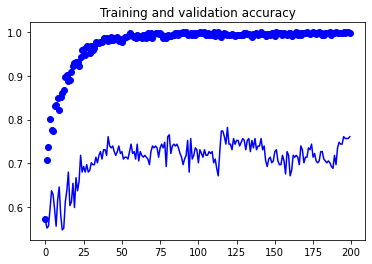

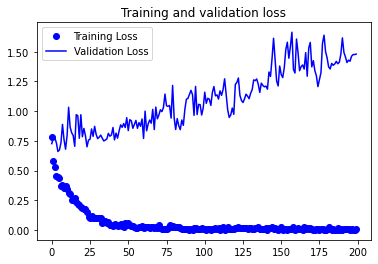

In [80]:
plotAccAndVal(experiment2)

In [7]:
max_acc_model = load_model("./saved_models/experiment_2/max_val_acc/epoch-120-val_acc-0.78.hdf5")
# min_loss_model = load_model("./saved_models/experiment_2/min_val_loss/epoch-05-val_loss-0.66.hdf5")

In [17]:
test_generator = test_datagen.flow_from_directory(
    "./test",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

Found 234 images belonging to 2 classes.


In [45]:
print(test_generator.filenames)

['benign\\ISIC_0250064.jpg', 'benign\\ISIC_0250069.jpg', 'benign\\ISIC_0250455.jpg', 'benign\\ISIC_0250842.jpg', 'benign\\ISIC_0251149.jpg', 'benign\\ISIC_0252448.jpg', 'benign\\ISIC_0252649.jpg', 'benign\\ISIC_0253178.jpg', 'benign\\ISIC_0253367.jpg', 'benign\\ISIC_0253516.jpg', 'benign\\ISIC_0253871.jpg', 'benign\\ISIC_0254158.jpg', 'benign\\ISIC_0254447.jpg', 'benign\\ISIC_0254517.jpg', 'benign\\ISIC_0254686.jpg', 'benign\\ISIC_0254698.jpg', 'benign\\ISIC_0255205.jpg', 'benign\\ISIC_0255508.jpg', 'benign\\ISIC_0255796.jpg', 'benign\\ISIC_0255843.jpg', 'benign\\ISIC_0255914.jpg', 'benign\\ISIC_0255997.jpg', 'benign\\ISIC_0256715.jpg', 'benign\\ISIC_0256926.jpg', 'benign\\ISIC_0257447.jpg', 'benign\\ISIC_0257755.jpg', 'benign\\ISIC_0258061.jpg', 'benign\\ISIC_0258065.jpg', 'benign\\ISIC_0258806.jpg', 'benign\\ISIC_0258821.jpg', 'benign\\ISIC_0259179.jpg', 'benign\\ISIC_0259615.jpg', 'benign\\ISIC_0260290.jpg', 'benign\\ISIC_0260316.jpg', 'benign\\ISIC_0260475.jpg', 'benign\\ISIC_02614

In [20]:
probabilities = max_acc_model.predict(test_generator)

In [50]:
# print(probabilities)

In [48]:
# first 117 elements are benign (malignant = 0 = false)
# first 117 elements are malignant (malignant = 1 = true)
y_true = np.array([0] * 117 + [1] * 117)
y_pred = probabilities > 0.5
print(y_pred)

confusionMatrix = confusion_matrix(y_true, y_pred)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 

In [51]:
def visualiseConfusionMatrix(confusionMatrix, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(
        confusionMatrix, 
        annot=True, 
        fmt=".3f", 
        linewidths=.75, 
        square = True, 
        cmap = "Blues_r",
        xticklabels=["Benign", "Malignant"],
        yticklabels=["Benign", "Malignant"]
    )
    plt.ylabel("Actual classification")
    plt.xlabel("Predicted predicted")
    plt.title(title, size = 15)

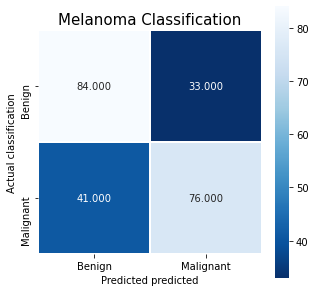

In [52]:
visualiseConfusionMatrix(confusionMatrix, "Melanoma Classification")

In [53]:
fpr = confusionMatrix[1][0] / (confusionMatrix[1][0] + confusionMatrix[1][1])
print(f"FPR: {round(fpr*100, 2)}%")

FPR: 35.04%


In [54]:
test_accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (confusionMatrix[0][0] + confusionMatrix[0][1] + confusionMatrix[1][0] + confusionMatrix[1][1])
print(f"Test accuracy: {round(test_accuracy*100, 2)}%")

Test accuracy: 68.38%
